In [82]:
%matplotlib inline
import ionsim
from scipy.constants import *
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from ipywidgets import interact

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = (8.0,6.0)
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 18
rc('animation', html='html5')

In [83]:
import importlib
importlib.reload(ionsim)

<module 'ionsim' from '/home/graum/ion_sim/ionsim.py'>

In [115]:
class test(ionsim.IonSim):
    fz = 2.74e6
    d = 15e-6
    theta = np.linspace(0, 2*pi, 6+1)[0:-1]
    xc = (d)*np.cos(theta)
    yc = (d)*np.sin(theta)
    zc = 0*theta
    r_sign = -1
    def U(self, t, x, y, z):
        dx = x[:, None] - self.xc
        dy = y[:, None] - self.yc
        dz = z[:, None] - self.zc
        w = dx**2 + dy**2 + dz**2 < (self.d/2)**2
        U0 = (1/2) * self.m * (2*pi*self.fz)**2
        return np.sum(U0*w*(dz**2 - (self.r_sign/2)*(dx**2+dy**2)))

    
sim = test()
sim.kq2 *= -1
sim.m = 9.01 * atomic_mass
sim.x0 = np.array([sim.xc, sim.yc, sim.zc])
x = sim.equilibrium_position(*sim.x0*0.9)

sim.kq2 *= -1
sim.r_sign *= -1
# @interact(i=(0,17))
# def interact_normal_modes(i=0):
#     ionsim.plot_normal_modes(sim, x, i)
    
@interact(i=(0,17))
def interact_penning_modes(i=0):
    plot_penning_modes(sim, x, np.array([0, 0, 2.5]), i)

In [92]:
f, v = sim.penning_modes(*x, B = np.array([0, 0, 2.5]))
f

array([-3033968.39445105, -3031242.91556002, -3031180.91787336,
       -3024008.48919112, -3024005.55841129, -3016383.58952105,
       -2740000.        , -2735066.68972625, -2735066.68972625,
       -2730333.84674629, -2730333.84674629, -2728512.49366103,
       -1244470.36943204, -1236801.05353005, -1236793.96811927,
       -1229673.04107973, -1229520.20386209, -1226838.21749027,
        1226838.21749027,  1229520.20386209,  1229673.04107973,
        1236793.96811927,  1236801.05353005,  1244470.36943204,
        2728512.49366103,  2730333.84674629,  2730333.84674629,
        2735066.68972625,  2735066.68972625,  2740000.        ,
        3016383.58952106,  3024005.55841128,  3024008.48919111,
        3031180.91787335,  3031242.91556001,  3033968.39445106])

In [78]:
(-2.54727896e-01)*(-1.41555288e-01)+(1.47067220e-01)*(-2.45180951e-01)

-1.8061217105236338e-10

In [79]:
( -2.54727896e-01)*(1.47067220e-01) + (-1.41555288e-01)*(-2.45180951e-01)

-0.0027554633902502346

In [40]:

wc = elementary_charge*(2.5)/(sim.m)
fc = wc/(2*pi)

B = np.array([0, 0, 2.5])
#np.cross(x, B, axisa=0, axisc=0)

# T = np.kron(np.cross(np.eye(3), np.array([0, 0, 1])*wc), np.eye(2))
# I = np.eye(T.shape[0])
# A=np.bmat([[1j*T, I],[I, 0*T]])
# B=np.bmat([[K, 0*K],[0*K, I]])
# f, v = np.linalg.eig(np.dot(np.linalg.inv(A), B))
# np.sort(np.real(f))/(2*pi)
# v[6:12,0]
f, v = sim.penning_modes(*x, B)

def plot_penning_modes(sim, x, B, i=0, scale=3):
    freq, v = sim.penning_modes(*x, B)
    
    v = v[:,freq>0]
    freq = freq[freq>0]
    
    freq_i = freq[i]
    v_i = np.squeeze(np.reshape(v[:,i], (3, -1)))
    rmax = np.max(np.abs(x))*3
    
    plt.figure(figsize=(10,8))
    n=5
    plt.subplot2grid((n, 1), (0, 0), rowspan=n-1)
    plt.plot(*x[0:2,:], 'ko', markersize=20)
    plt.quiver(*x[0:2,:], *(np.real(v_i)+x)[0:2,:], color='b', scale=scale)
    plt.quiver(*x[0:2,:], *(np.imag(v_i)-x)[0:2,:], color='r', scale=scale)
    
    plt.xlim(-rmax, rmax)
    plt.ylim(-rmax, rmax)
    plt.gca().set_aspect('equal', 'datalim')
    
    plt.subplot2grid((n, 1), (n-1, 0), rowspan=1)
    plt.stem(freq, np.ones(freq.shape), linefmt='0.5', markerfmt='0.75', basefmt='0.75')
    _, stemlines, _ = plt.stem([freq[i]], [1], linewidth=5)
    plt.setp(stemlines, 'linewidth', 3)
    plt.ylim((0.25,0.75))
    plt.yticks([])
    plt.xlabel('Frequency')

    plt.tight_layout()
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    plt.show()
    
@interact(i=(0,6*3-1))
def interact_penning_modes(i=0):
    plot_penning_modes(sim, x, B, i)

In [15]:
np.dot(np.real(v[[0,6],5]), np.imag(v[[0,6],5]))

-2.4042249770231128e-17

In [10]:
v[7,5]

(-0.28867513459482247-3.1050531688209977e-15j)

In [1620]:
v

/scratch/python36/lib/python3.6/site-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


array([[ -4.331052456290e-17 +2.847165704786e-01j,
          2.578626160782e-14 +2.831105763392e-01j,
         -6.976343074564e-16 +2.886751345948e-01j,
         -2.928891018223e-01 +2.388456558031e-16j,
         -2.743511853420e-15 +2.845536356503e-01j,
         -7.565198963858e-15 +2.886751345948e-01j,
          9.360628636192e-17 -4.797333518209e-16j,
         -3.326730467919e-17 -1.674324555467e-16j,
         -2.097315161913e-16 +9.895979685650e-17j,
          7.277062327956e-18 +5.449667197347e-17j,
          1.396018494250e-17 +5.779261556889e-17j,
         -1.673255146302e-16 +1.982521438422e-16j,
         -2.886751345948e-01 +3.389191143336e-15j,
          6.105949361407e-14 +2.775375538076e-01j,
         -2.996779888417e-01 +0.000000000000e+00j,
         -8.089582028082e-16 +2.886751345949e-01j,
          2.191523549725e-15 +2.724752391889e-01j,
         -5.622031147194e-17 +2.770741374664e-01j,
         -6.807387465438e-16 +2.770741374664e-01j,
         -1.062068884971e-14 +2

In [1004]:
  -0.070173362563872  -0.121543829298578  -0.000000000000000  -0.000000000101075  -0.000000000120897  -0.000000000000000
  -0.070173362563872   0.121543829298578   0.000000000000000  -0.000000000102554   0.000000000126858  -0.000000000000000
   0.070173362563872  -0.121543829298578  -0.000000000000000   0.000000000102517  -0.000000000121511   0.000000000000000
   0.070173362563872   0.121543829298578   0.000000000000000   0.000000000101061   0.000000000125409   0.000000000000000
   0.140346725127744  -0.000000000000000   0.000000000000000   0.000000000194855   0.000000000000000   0.000000000000000
  -0.140346725127744  -0.000000000000000   0.000000000000000  -0.000000000189384   0.000000000000000   0.000000000000000

In [684]:
def F_Coulomb(x, y, z):
    n = x.size
    r = np.zeros((3, n, n))
    for i, w in enumerate([x, y, z]):
        r[i, :, :] = w[:, None] - w
    r2 = np.sum(r**2, axis=0)
    np.fill_diagonal(r2, np.inf)
    r3 = r2**(-3 / 2)
    F = np.zeros((3, n))
    for i in range(3):
        F[i, :] = kq2 * np.sum(r[i, :, :] * r3, axis=1)
    return F

F_Coulomb(*sim.x0)

array([[ -1.02536778e-18,   1.02536778e-18],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]])

In [656]:
for i in range(1000):
    sim.F_Coulomb(*sim.x0)

In [604]:
import scipy.constants as _c
kq2 = _c.elementary_charge**2 / (4 * _c.pi * _c.epsilon_0)
def U_Coulomb(x, y, z):
    r2 = (x[:,None]-x)**2 + (y[:,None]-y)**2 + (z[:,None]-z)**2
    r = np.sqrt(r2[np.triu_indices(np.size(x),1)])
    return np.sum(kq2/r)
 
def F_Coulomb(x, y, z):
    Fx = -grad(U_Coulomb, 0)(x, y, z)
    Fy = -grad(U_Coulomb, 1)(x, y, z)
    Fz = -grad(U_Coulomb, 2)(x, y, z)
    return np.array([Fx, Fy, Fz])

def U_test(x, y, z):
    r2 = (x[:,None]-x)**2 + (y[:,None]-y)**2 + (z[:,None]-z)**2
    return np.sum(r2)

r2 = (x[:,None]-x)**2 + (y[:,None]-y)**2 + (z[:,None]-z)**2
r = np.sqrt(r2)
np.sum(kq2/r[np.triu_indices(6,1)])
print(F_Coulomb(*x0))
print(sim.F_Coulomb(*x0))

[[  1.87370610e-18   9.36853048e-19  -9.36853048e-19  -1.87370610e-18
   -9.36853048e-19   9.36853048e-19]
 [ -1.73333695e-33   1.62267708e-18   1.62267708e-18   1.34815096e-33
   -1.62267708e-18  -1.62267708e-18]
 [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]]
[[  1.87370610e-18   9.36853048e-19  -9.36853048e-19  -1.87370610e-18
   -9.36853048e-19   9.36853048e-19]
 [ -1.87017048e-33   1.62267708e-18   1.62267708e-18   1.37512536e-33
   -1.62267708e-18  -1.62267708e-18]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


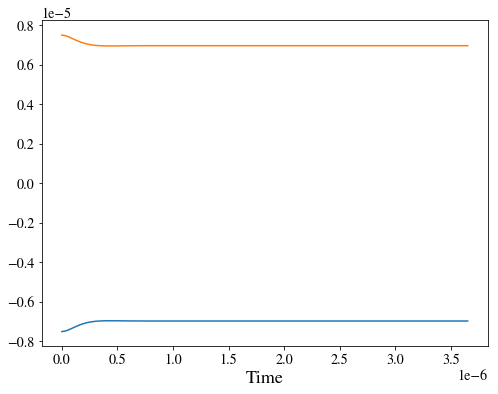

In [213]:
class test(ionsim.IonSim):
    fz = 2.74e6
    d = 15e-6
    xc = [-d/2, d/2]
    yc = [0, 0]
    zc = [0, 0]
    
    def U(self, t, x, y, z):
        U = 0
        for xi, yi, zi in zip(self.xc, self.yc, self.zc):
            r = np.sqrt((x-xi)**2 + (y-yi)**2 + (z-zi)**2)
            w = r < self.d/2
            U += w*(1/2)*self.m*(2*pi*self.fz)**2 * (1/2)*(x-xi)**2
            U += w*(1/2)*self.m*(2*pi*self.fz)**2 * (1/2)*(y-yi)**2
            U += w*(1/2)*self.m*(2*pi*self.fz)**2 * (z-zi)**2
        return U
    
s = test()
s.m = 9.01 * atomic_mass
s.gamma = s.m*(2*pi*s.fz) * np.array([1, 1, 1])
s.x0 = np.zeros((6,2))
for i, (xi, yi, zi) in enumerate(zip(s.xc, s.yc, s.zc)):
    s.x0[0,i] = xi
    s.x0[1,i] = yi
    s.x0[2,i] = zi
    s.x0[3,i] = 0
    s.x0[4,i] = 0
    s.x0[5,i] = 0
    
t = np.linspace(0, 10/s.fz, 100)
s.run(t)
ionsim.plot(s)

In [17]:
class example1(ionsim.IonSim):
    def U(self, t, x, y, z):
        self.fx = 1e6
        self.fy = 2e6
        self.fz = 3e6
        Ux = (1/2) * self.m * (2*pi*self.fx)**2 * x**2
        Uy = (1/2) * self.m * (2*pi*self.fy)**2 * y**2
        Uz = (1/2) * self.m * (2*pi*self.fz)**2 * z**2
        return Ux + Uy + Uz
    
ex1 = example1()
ex1.m = 40 * atomic_mass
ex1.gamma = ex1.m * 1e6 * np.array([1, 1, 1])
ex1.init_thermal(n=2, T=1e-3, sigma=(1e-6, 1e-6, 1e-6))
t = np.linspace(0, 20e-6, 200)
ex1.run(t)

@interact(i=(0,5))
def ex1_normal_modes(i=0):
    ionsim.plot_normal_modes(ex1, i, surface=False)

In [23]:
class example2(ionsim.IonSim):
    def U(self, t, x, y, z):
        self.fx = 1e6
        self.fy = 1e6
        self.fz = 10e6
        Ux = (1/2) * self.m * (2*pi*self.fx)**2 * x**2
        Uy = (1/2) * self.m * (2*pi*self.fy)**2 * y**2
        Uz = (1/2) * self.m * (2*pi*self.fz)**2 * z**2
        return Ux + Uy + Uz
    
ex2 = example2()
ex2.m = 40 * atomic_mass
ex2.gamma = ex1.m * 1e6 * np.array([1, 1, 1])
ex2.init_thermal(n=50, T=1e-3, sigma=(1e-6, 1e-6, 1e-6))
t = np.linspace(0, 20e-6, 200)
ex2.run(t)

ionsim.plot(ex2)
ionsim.animate(ex2)
@interact(i=(0,149))
def ex1_normal_modes(i=0):
    ionsim.plot_normal_modes(ex2, i, surface=False)

In [33]:
class example3(ionsim.IonSim):
    def U(self, t, x, y, z):
        self.fx = 1e6
        self.fy = 10e6
        self.fz = 10e6
        Ux = (1/2) * self.m * (2*pi*self.fx)**2 * x**2
        Uy = (1/2) * self.m * (2*pi*self.fy)**2 * y**2
        Uz = (1/2) * self.m * (2*pi*self.fz)**2 * z**2
        return Ux + Uy + Uz
    
ex3 = example3()
ex3.m = np.array([9, 40, 40, 9]) * atomic_mass
ex3.gamma = ex1.m * 1e6 * np.array([1, 1, 1])
ex3.init_thermal(n=4, T=10e-3, sigma=(1e-6, 1e-6, 1e-6))
t = np.linspace(0, 20e-6, 200)
ex3.run(t)

# ionsim.plot(ex3)
# ionsim.animate(ex3)
@interact(i=(0,11))
def ex3_normal_modes(i=0):
    ionsim.plot_normal_modes(ex3, i, surface=False)

/scratch/python36/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


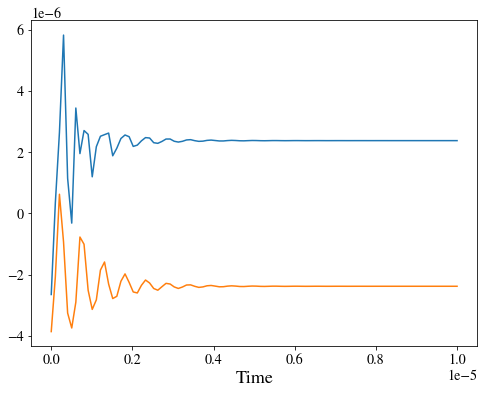

In [19]:
class example4(ionsim.IonSim):
    def U(self, t, x, y, z):
        m = self.m / atomic_mass
        Ux = (1/2)*self.m*(1e6*np.sqrt(2584/m))**2*x**2
        Uy = (1/2)*self.m*(1e6*np.sqrt(323679/m**2 + 8525/m))**2*y**2
        Uz = (1/2)*self.m*(1e6*np.sqrt(580227/m**2 - 11064/m))**2*z**2
        return Ux + Uy + Uz
    
ex4 = example4()
ex4.gamma = 24 * atomic_mass * 2e6 * np.array([1, 1, 1])
ex4.init_thermal(n=2, T=5e-3, sigma=(5e-6, 5e-6, 5e-6))
ex4.m = np.array([9, 24]) * atomic_mass
t = np.linspace(0, 10e-6, 100)
ex4.run(t)
ionsim.plot(ex4, dim=0)
# plt.ylabel('X (m)');

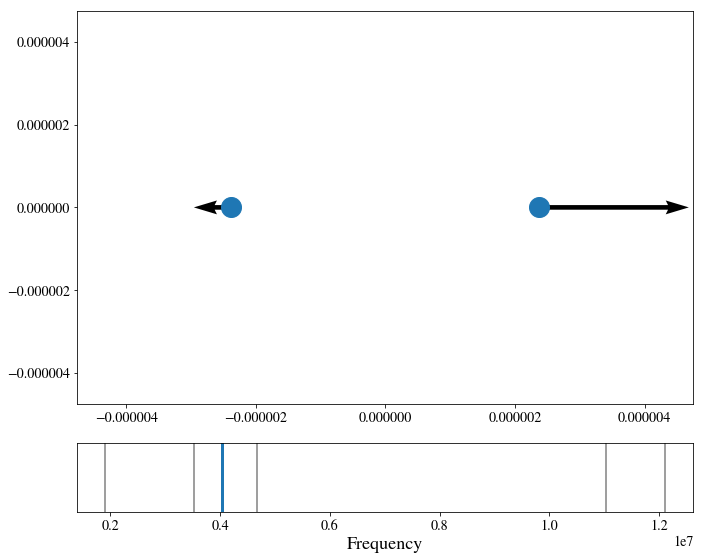

In [30]:
ionsim.plot_normal_modes(ex4, scale=4, i=2, surface=False)